In [1]:
using Pkg
Pkg.activate(".")
using SymPy
using LinearAlgebra
using Plots

  Activating project at `c:\Users\tim\Documents\2025FallExamples\10-27`


In [2]:
λ, z = symbols("lambda z")
θ, h, σ, ω = symbols("theta h sigma omega", real=true)

(theta, h, sigma, omega)

## Forward Euler
$$ x_{n} = (1+\lambda h)^n x_0$$

In [3]:
f = 1 + (σ +1im*ω) - (cos(θ) + 1im*sin(θ))

I*omega + sigma - I*sin(theta) - cos(theta) + 1

In [4]:
sol = solve( [real(f), imag(f)], [σ,ω])

Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 2 entries:
  sigma => cos(theta) - 1
  omega => sin(theta)

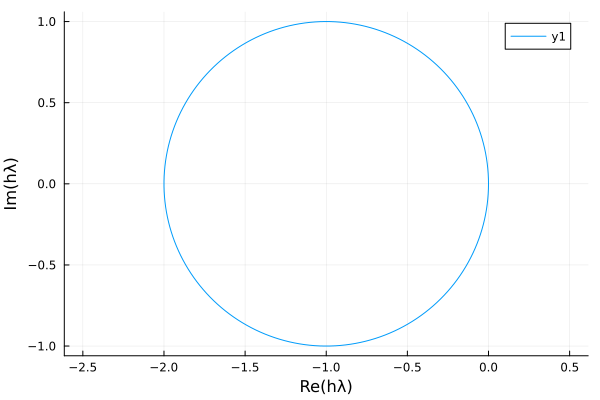

In [5]:
plot( sol[σ], sol[ω], 0, 2π, aspect_ratio=:equal,
    xlabel="Re(hλ)", ylabel="Im(hλ)")

## Backwards Euler
$$ x_{n} = (1-\lambda h)^{-n} x_0$$

In [6]:
f = 1/(1 - (σ + 1im * ω)) - (cos(θ) + 1im * sin(θ))

                                      1          
-I*sin(theta) - cos(theta) + --------------------
                             -I*omega - sigma + 1

In [7]:
sol = solve([real(f), imag(f)], [σ, ω], dict=true)[1]

Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 2 entries:
  sigma => 1 - cos(theta)
  omega => sin(theta)

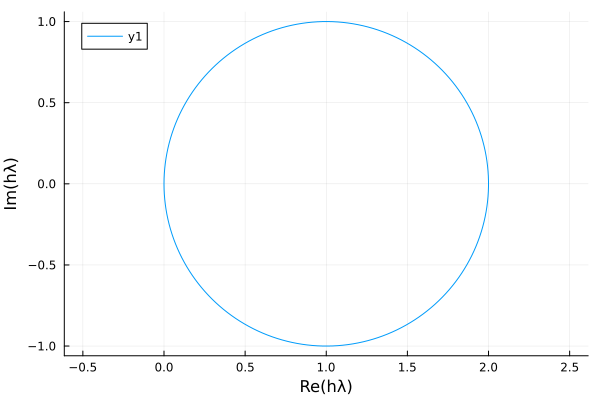

In [8]:
plot(sol[σ], sol[ω], 0, 2π, aspect_ratio=:equal,
    xlabel="Re(hλ)", ylabel="Im(hλ)")

## Runge-Kutta
$$ r(z) = \frac{\text{det}\left(I - zA + zeb^T \right)}{\text{det}\left(I - zA \right)}$$
where $e = [1,1,1,\cdots,1]$

In [9]:
ee(s) = ones(Float64, s)
ϕ(z, A, b) = -1 + abs(det(I - z * A + z * ee(length(b)) * transpose(b)) / det(I - z * A))

ϕ (generic function with 1 method)

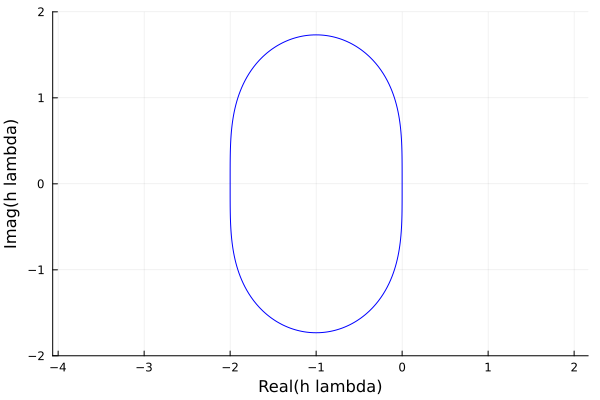

In [10]:
A1 = [0 0; 2/3 0]
b1 = [1 / 4, 3 / 4]

zx = LinRange(-2, 0.1, 100)
zy = LinRange(-2, 2, 101)
data = [ϕ(Zx + 1im * Zy, A1, b1) for Zy in zy, Zx in zx]
plt = contour(zx, zy, data, levels=[0], color=:blue,

label="RK 2",
    aspect_ratio=:equal,
    colorbar=false,
    xlabel="Real(h lambda)", ylabel="Imag(h lambda)")

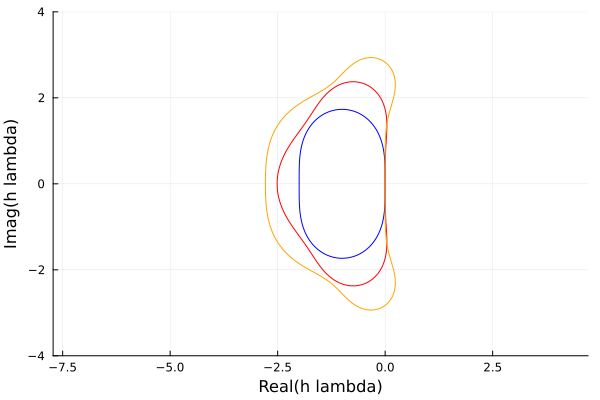

In [11]:
# SSPRK3
A = [0 0 0;
    1 0 0;
    1/4 1/4 0]
b = [1 / 6, 1 / 6, 2 / 3]
zx = LinRange(-3, 0.1, 100)
zy = LinRange(-4, 4, 101)
data = [ϕ(Zx + 1im * Zy, A, b) for Zy in zy, Zx in zx]
plot!(plt, zx, zy, data, levels=[0], color=:red, label="SSPRK3")

# RK4
A = [0 0 0 0;
    1/2 0 0 0;
    0 1/2 0 0;
    0 0 1 0]
b = [1 / 6, 1 / 3, 1 / 3, 1 / 6]
zx = LinRange(-4, 1, 100)
zy = LinRange(-4, 4, 101)
data = [ϕ(Zx + 1im * Zy, A, b) for Zy in zy, Zx in zx]
plot!(plt, zx, zy, data, levels=[0], color=:orange, label="Classic RK4")